# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Settings

In [2]:
# To view all generated results
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

# Widen the Jupyter Notebook as much as possible
from IPython.core.display import display, HTML
display(HTML('<style>.container { width:100% !important; }</style>'))

# Import Data
Source: https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results

In [3]:
# This is the main dataset for Olympics from 1896 to 2016
df = pd.read_csv('Data\\athlete_events.csv', index_col=None, header=0)
df.head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


In [4]:
# View dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [5]:
# Check for missing values
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [6]:
# View numerical distribution
df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [7]:
# Check for duplicated rows based on all columns
len(df[df.duplicated()])

# Duplicates here might be due to multiple web-scraping operations with overlapping first and last rows

1385

In [8]:
# Remove duplicates
df.drop_duplicates(inplace=True)

# Check again for duplicated rows based on all columns
len(df[df.duplicated()])

0

In [9]:
# This is the dataset that describes nationality
noc = pd.read_csv('Data\\noc_regions.csv', index_col=None, header=0)
noc.head(10)

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN
5,ANG,Angola,NaN
6,ANT,Antigua,Antigua and Barbuda
7,ANZ,Australia,Australasia
8,ARG,Argentina,NaN
9,ARM,Armenia,NaN


In [10]:
# Remove the last column as it is not relevant nor useful
noc.drop(columns='notes', inplace=True)

In [11]:
# Check for duplicated rows based on all columns
len(noc[noc.duplicated()])

0

In [12]:
# Merge dataframes
df = df.merge(noc, on=['NOC'], how='left')
df.head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands


# Data Exploration

In [13]:
# Set column names to uppercase for standardisation purposes
df.columns = df.columns.str.upper()

In [14]:
# Explore the types of seasons
df.SEASON.value_counts()

Summer    221167
Winter     48564
Name: SEASON, dtype: int64

In [15]:
# Select only Summer Olympics as the season of interest and contains more data
df = df[df.SEASON == 'Summer']

In [16]:
# Sort data based on year, sport and event
df.sort_values(by=['YEAR', 'SPORT', 'EVENT'], inplace=True)
df.head(30)

# Each sport event comprises of all athletes regardless of medals

,ID,NAME,SEX,AGE,HEIGHT,WEIGHT,TEAM,NOC,GAMES,YEAR,SEASON,CITY,SPORT,EVENT,MEDAL,REGION
22850,12068,Arthur Charles Blake,M,24.0,NaN,NaN,United States,USA,1896 Summer,1896,Summer,Athina,Athletics,"Athletics Men's 1,500 metres",Silver,USA
68412,35094,Angelos Fetsis,M,NaN,NaN,NaN,Greece,GRE,1896 Summer,1896,Summer,Athina,Athletics,"Athletics Men's 1,500 metres",NaN,Greece
69698,35698,"Edwin Harold ""Teddy"" Flack",M,22.0,NaN,NaN,Australia,AUS,1896 Summer,1896,Summer,Athina,Athletics,"Athletics Men's 1,500 metres",Gold,Australia
74723,38123,Carl Galle,M,23.0,154.0,45.0,Germany,GER,1896 Summer,1896,Summer,Athina,Athletics,"Athletics Men's 1,500 metres",NaN,Germany
80612,41160,Dimitrios P. Golemis,M,21.0,NaN,NaN,Greece,GRE,1896 Summer,1896,Summer,Athina,Athletics,"Athletics Men's 1,500 metres",NaN,Greece
112750,57441,Konstantinos Karakatsanis,M,NaN,NaN,NaN,Greece,GRE,1896 Summer,1896,Summer,Athina,Athletics,"Athletics Men's 1,500 metres",NaN,Greece
136314,68911,Albin Georges Lermusiaux,M,21.0,NaN,NaN,France,FRA,1896 Summer,1896,Summer,Athina,Athletics,"Athletics Men's 1,500 metres",Bronze,France
240178,120917,"Dimitrios Mikhail ""Dimitri"" Tombrof",M,18.0,NaN,NaN,Greece,GRE,1896 Summer,1896,Summer,Athina,Athletics,"Athletics Men's 1,500 metres",NaN,Greece
32168,16616,"Thomas Edmund ""Tom"" Burke",M,21.0,183.0,66.0,United States,USA,1896 Summer,1896,Summer,Athina,Athletics,Athletics Men's 100 metres,Gold,USA
47139,24423,"Thomas Pelham ""Tom"" Curtis",M,23.0,176.0,66.0,United States,USA,1896 Summer,1896,Summer,Athina,Athletics,Athletics Men's 100 metres,NaN,USA


# Historic Overview of Women Participation

In [17]:
# Explore the historic female vs male athlete events
def hist_gender_event(df, col_year, col_sex, col_event):
    
    '''
    INPUT:
    df - main pandas dataframe
    col_year - column specifying which year of olympics
    col_sex - column that describes the sex of sports event
    col_event - column that describes the sports event
    
    OUTPUT:
    df_new - holds event count for each sex and its proportion of total event count for each year of Summer Olympics
    '''
    
    # Generate pivot table that counts number of unique events for each year
    df_new = pd.pivot_table(df, index=[col_year], columns=[col_sex], values=[col_event], aggfunc=pd.Series.nunique)
    
    # Combine and flatten multi-index columns using character "_"
    df_new.columns = df_new.columns.map('_'.join).str.strip('_')
    df_new = df_new.reset_index()
    
    # Replace any missing values with 0 to ensure subsequent calculation of EVENT_TOTAL is not NaN and has an actual value
    df_new.fillna(0, inplace=True)
    
    # Calculate total event and % of Male and Female events    
    df_new['EVENT_TOTAL'] = df_new['EVENT_F'] + df_new['EVENT_M']
    df_new['EVENT_FEMALE_PERC'] = np.round(df_new['EVENT_F'] / df_new['EVENT_TOTAL'] * 100, 0)
    df_new['EVENT_MALE_PERC'] = np.round(100 - df_new['EVENT_FEMALE_PERC'], 0)
    
    return df_new
    
    
df_hist_event = hist_gender_event(df, 'YEAR', 'SEX', 'EVENT')
df_hist_event

# There is a strong trend of increasing participation of women in the Summer Olympics despite recent stagnancy

,YEAR,EVENT_F,EVENT_M,EVENT_TOTAL,EVENT_FEMALE_PERC,EVENT_MALE_PERC
0,1896,0.0,43.0,43.0,0.0,100.0
1,1900,8.0,88.0,96.0,8.0,92.0
2,1904,3.0,92.0,95.0,3.0,97.0
3,1906,2.0,73.0,75.0,3.0,97.0
4,1908,7.0,105.0,112.0,6.0,94.0
5,1912,7.0,102.0,109.0,6.0,94.0
6,1920,12.0,150.0,162.0,7.0,93.0
7,1924,17.0,121.0,138.0,12.0,88.0
8,1928,21.0,108.0,129.0,16.0,84.0
9,1932,20.0,117.0,137.0,15.0,85.0


In [18]:
# Explore the historic participation of female vs male athletes by sheer athlete volume
def hist_gender(df, col_year, col_sex, col_name):
    
    '''
    INPUT:
    df - main pandas dataframe
    col_year - column specifying which year of olympics
    col_sex - column that describes the sex of sports COUNT
    col_name - column that describes the atheletes' names, used as a counter
    
    OUTPUT:
    df_new - holds COUNT count for each sex and its proportion of total COUNT count for each year of Summer Olympics
    '''
    
    # Generate pivot table that counts number of unique COUNTs for each year
    df_new = pd.pivot_table(df, index=[col_year], columns=[col_sex], values=[col_name], aggfunc='count')
    
    # Combine and flatten multi-index columns using character "_"
    df_new.columns = df_new.columns.map('_'.join).str.strip('_')
    df_new.columns = df_new.columns.str.replace(col_name, 'COUNT')
    df_new = df_new.reset_index()
    
    # Replace any missing values with 0 to ensure subsequent calculation of COUNT_TOTAL is not NaN and has an actual value
    df_new.fillna(0, inplace=True)
    
    # Calculate total COUNT and % of Male and Female COUNTs
    df_new['COUNT_TOTAL'] = df_new['COUNT_F'] + df_new['COUNT_M']
    df_new['COUNT_FEMALE_PERC'] = np.round(df_new['COUNT_F'] / df_new['COUNT_TOTAL'] * 100, 0)
    df_new['COUNT_MALE_PERC'] = np.round(100 - df_new['COUNT_FEMALE_PERC'], 0)
    
    return df_new
    
    
df_hist = hist_gender(df, 'YEAR', 'SEX', 'NAME')
df_hist

# Same trend observed as athelete event

,YEAR,COUNT_F,COUNT_M,COUNT_TOTAL,COUNT_FEMALE_PERC,COUNT_MALE_PERC
0,1896,0.0,380.0,380.0,0.0,100.0
1,1900,33.0,1865.0,1898.0,2.0,98.0
2,1904,16.0,1285.0,1301.0,1.0,99.0
3,1906,11.0,1722.0,1733.0,1.0,99.0
4,1908,47.0,3022.0,3069.0,2.0,98.0
5,1912,87.0,3953.0,4040.0,2.0,98.0
6,1920,134.0,4158.0,4292.0,3.0,97.0
7,1924,234.0,4876.0,5110.0,5.0,95.0
8,1928,391.0,4265.0,4656.0,8.0,92.0
9,1932,265.0,2200.0,2465.0,11.0,89.0


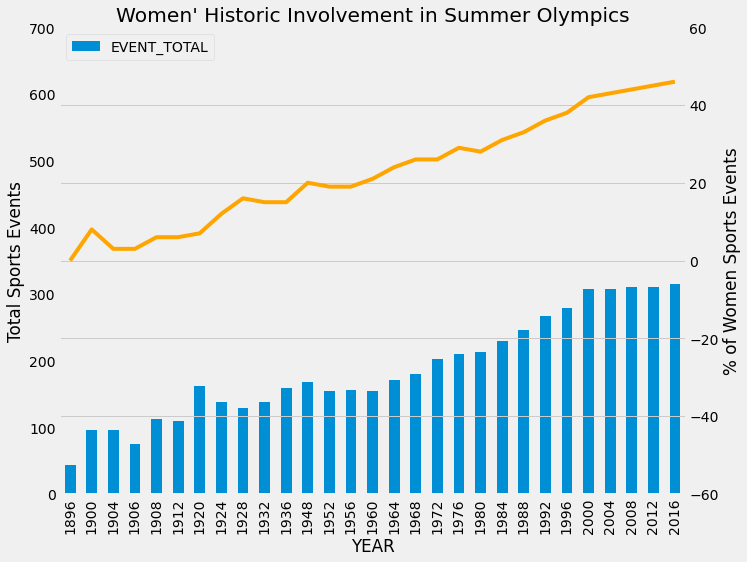

In [19]:
# Plot historic female vs male athlete events

# Styling
plt.rcParams['figure.figsize'] = (10, 8) # set the figure size
plt.style.use('fivethirtyeight')

# Barplot
ax = df_hist_event.plot(x='YEAR', y='EVENT_TOTAL', kind='bar')
ax.grid(False)
ax.set_ylim(0, 700)

# Line graph
ax1 = ax.twinx()
ax1.plot(df_hist_event['EVENT_FEMALE_PERC'], color='orange')
ax1.set_ylim(-60, 60)

# Legends and axis titles
ax.legend(loc='upper left')
ax.set_ylabel('Total Sports Events')
ax1.set_ylabel('% of Women Sports Events')
plt.title("Women' Historic Involvement in Summer Olympics")
plt.xlabel('Year')
plt.show()

# Early 1950s seems to be the tipping point after being relatively stagnant

1. The first Olympics in 1896 in Athens had 0 women participation. Until 1920, women only took part in 1 out of 10 events and some of these were mixed-gender events and not women-only.
2. Women’s participation rose since the debut of female athletes in the 1900 Olympics in Paris. But, the first tipping point was after World War II in the 1950s in which women’s involvement improved to 1 out of 5 events.
3. Another tipping point was in the 1980s, where women’s participation started to increase drastically from 1 out of 4 events to 1 out of 2 events in the 21st century.

# Sports or Events Contributing to Women Participation

In [20]:
# Explore which sports contribute to the rise in Women Participation
def hist_gender_sport_top_ten(df, col_year, col_sex, col_sport, col_event, year, false):
    
    '''
    INPUT:
    df - main pandas dataframe
    col_year - column specifying which year of olympics
    col_sex - column that describes the sex of sports event
    col_sport - column that describes the sports
    col_event - column that describes the sports event
    year - year that wish to sort the table in descending order
    True/False - True means ascending while False means descending
    
    OUTPUT:
    df_new - holds event count for each sex and its proportion of total event count for each year of Summer Olympics
    '''
    
    # Generate pivot table that counts number of unique events for each year
    df_new = pd.pivot_table(df[df[col_sex] == 'F'], index=[col_sport], columns=[col_year], values=[col_event], aggfunc=pd.Series.nunique)
    
    # Flatten multi-index columns by choosing the second level
    df_new.columns = df_new.columns.droplevel(0)
    
    # Sort table based on selected year  
    df_new.sort_values(by=year, ascending=false, inplace=True)
    
    return df_new.head(10)
    

# Top 10 sports
df_hist_sport = hist_gender_sport_top_ten(df, 'YEAR', 'SEX', 'SPORT', 'EVENT', 1956, False)
df_hist_sport

# Since the 1950s, swimming mainly contributed to the women participation.
# Athletics, shooting and equestrianism also contributed to the women participation.

YEAR,1900,1904,1906,1908,1912,1920,1924,1928,1932,1936,1948,1952,1956,1960,1964,1968,1972,1976,1980,1984,1988,1992,1996,2000,2004,2008,2012,2016
SPORT,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Athletics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,6.0,6.0,9.0,9.0,9.0,10.0,12.0,12.0,14.0,14.0,14.0,17.0,18.0,19.0,20.0,22.0,22.0,23.0,23.0,23.0
Gymnastics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,7.0,7.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0
Swimming,NaN,NaN,NaN,NaN,2.0,3.0,5.0,5.0,5.0,5.0,5.0,5.0,6.0,7.0,8.0,14.0,14.0,13.0,13.0,14.0,15.0,15.0,16.0,16.0,16.0,17.0,17.0,17.0
Equestrianism,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,4.0,3.0,6.0,6.0,6.0,6.0,5.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0
Diving,NaN,NaN,NaN,NaN,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,4.0,4.0,4.0,4.0,4.0
Canoeing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,2.0,2.0,2.0,3.0,2.0,2.0,3.0,3.0,4.0,4.0,4.0,4.0,4.0,5.0,5.0
Fencing,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,4.0,4.0,4.0,5.0,5.0,5.0
Alpinism,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Archery,NaN,3.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0


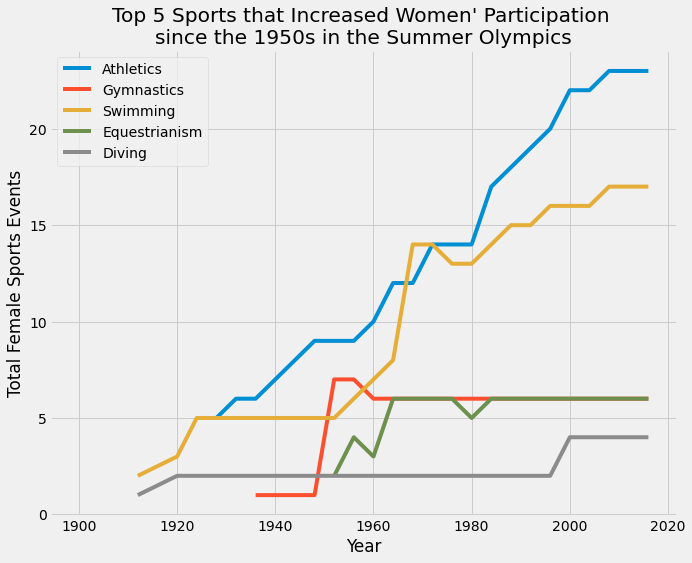

In [21]:
# Plot top 5 sports that promoted female participation in terms of athlete event count

# Transpose the dataframe
df_hist_sport_t = df_hist_sport.head(5).T

# Styling
plt.rcParams['figure.figsize'] = (10, 8) # set the figure size
plt.style.use('fivethirtyeight')

# Line graph
ax = df_hist_sport_t.plot.line()

# Legends and axis titles
ax.legend(loc='upper left')
ax.set_ylabel('Total Female Sports Events')
plt.title("""Top 5 Sports that Increased Women' Participation 
since the 1950s in the Summer Olympics""")
plt.xlabel('Year')
plt.show()

- From the chart, Athletics and Swimming played a huge role in boosting women’s involvement in the Olympics in the 1950s.
- In addition, women’s participation in the same sports also skyrocketed around the second tipping point in the 1980s.

In [22]:
# Explore which sports contribute to the rise in Women Participation
def hist_gender_sport_perc_top_ten(df, col_year, col_sex, col_sport, col_event, year, false):
    
    '''
    INPUT:
    df - main pandas dataframe
    col_year - column specifying which year of olympics
    col_sex - column that describes the sex of sports event
    col_sport - column that describes the sports
    col_event - column that describes the sports event
    year - year that wish to sort the table in descending order
    True/False - True means ascending while False means descending
    
    OUTPUT:
    df_new - holds event count for each sex and its proportion of total event count for each year of Summer Olympics
    '''
    
    # Sort dataframe based on year, gender & event
    df2 = df
    df2.sort_values(by=[col_year, col_event, col_sex], ascending=True, inplace=True)
    
    # Generate indicator for each unique year-gender-event combination
    df2['GENDER_EVENT_COUNT'] = 1
    df2.loc[(df2[col_year] == df2[col_year].shift()) & (df2[col_sex] == df2[col_sex].shift()) &
               (df2[col_event] == df2[col_event].shift()), 'GENDER_EVENT_COUNT'] = 0
    
    # Women
    # Generate pivot table that counts number of unique events for each year
    df_new = pd.pivot_table(df2[df2[col_sex] == 'F'], index=[col_sport], columns=[col_year], values=['GENDER_EVENT_COUNT'], aggfunc=np.sum)
    
    # Flatten multi-index columns by choosing the second level
    df_new.columns = df_new.columns.droplevel(0)
    
    
    # Total (Men & Women)
    # Generate pivot table that counts number of unique events for each year
    df_new2 = pd.pivot_table(df2, index=[col_sport], columns=[col_year], values=['GENDER_EVENT_COUNT'], aggfunc=np.sum)
    
    # Flatten multi-index columns by choosing the second level
    df_new2.columns = df_new2.columns.droplevel(0)
    
    # Divide Women by Total to obtain the %
    df_perc = (df_new / df_new2)
    
    # Sort table based on selected year  
    df_perc.sort_values(by=year, ascending=false, inplace=True)
    
    return df_perc.head(10)
    

# Top 10 sports
df_hist_sport_perc = hist_gender_sport_perc_top_ten(df, 'YEAR', 'SEX', 'SPORT', 'EVENT', 1956, False)
df_hist_sport_perc

YEAR,1896,1900,1904,1906,1908,1912,1920,1924,1928,1932,1936,1948,1952,1956,1960,1964,1968,1972,1976,1980,1984,1988,1992,1996,2000,2004,2008,2012,2016
SPORT,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Diving,NaN,NaN,NaN,NaN,NaN,0.250000,0.4,0.400000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
Gymnastics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.125000,NaN,0.111111,0.111111,0.466667,0.466667,0.428571,0.428571,0.428571,0.428571,0.428571,0.428571,0.428571,0.428571,0.428571,0.428571,0.428571,0.428571,0.428571,0.428571,0.428571
Swimming,NaN,NaN,NaN,NaN,NaN,0.222222,0.3,0.454545,0.454545,0.454545,0.454545,0.454545,0.454545,0.461538,0.466667,0.444444,0.482759,0.482759,0.500000,0.500000,0.482759,0.483871,0.483871,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
Equestrianism,NaN,0.166667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.250000,0.400000,0.375000,0.500000,0.500000,0.500000,0.500000,0.454545,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
Athletics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.185185,0.206897,0.206897,0.272727,0.272727,0.272727,0.294118,0.333333,0.333333,0.368421,0.378378,0.368421,0.414634,0.428571,0.441860,0.454545,0.478261,0.478261,0.489362,0.489362,0.489362
Fencing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.400000,0.400000,0.400000,0.500000,0.500000,0.500000
Canoeing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.111111,0.111111,0.111111,0.285714,0.285714,0.285714,0.272727,0.181818,0.181818,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.312500,0.312500
Aeronautics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alpinism,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


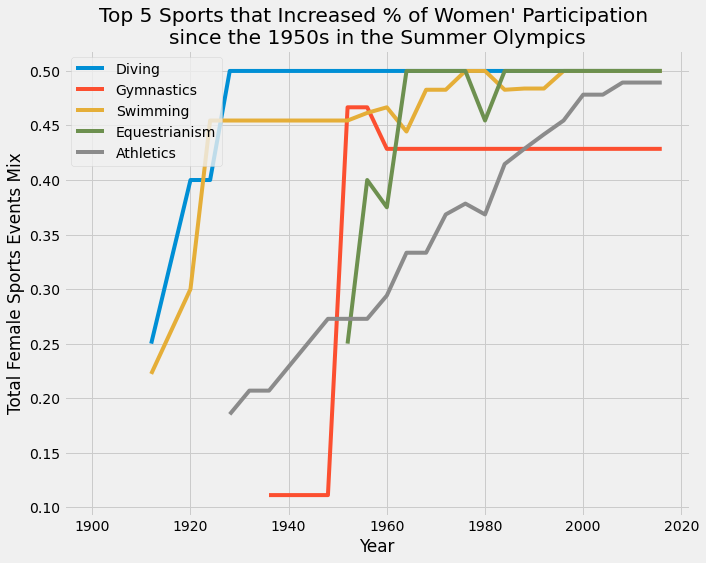

In [23]:
# Plot top 5 sports that promoted female participation in terms of athlete event mix

# Transpose the dataframe
df_hist_sport_perc_t = df_hist_sport_perc.head(5).T

# Styling
plt.rcParams['figure.figsize'] = (10, 8) # set the figure size
plt.style.use('fivethirtyeight')

# Line graph
ax = df_hist_sport_perc_t.plot.line()

# Legends and axis titles
ax.legend(loc='upper left')
ax.set_ylabel('Total Female Sports Events Mix')
plt.title("""Top 5 Sports that Increased % of Women' Participation 
since the 1950s in the Summer Olympics""")
plt.xlabel('Year')
plt.show()

# Mix wise, it is consistent with the absolute count

# Countries Contributing to Women Participation

In [24]:
# Explore which countries contribute to the rise in Women Participation
def hist_gender_country_top_ten(df, col_year, col_sex, col_country, col_event, year, false):
    
    '''
    INPUT:
    df - main pandas dataframe
    col_year - column specifying which year of olympics
    col_sex - column that describes the sex of sports event
    col_country - column that describes the country
    col_event - column that describes the sports event
    year - year that wish to sort the table in descending order
    True/False - True means ascending while False means descending
    
    OUTPUT:
    df_new - holds event count for each sex and its proportion of total event count for each year of Summer Olympics
    '''
    
    # Generate pivot table that counts number of unique events for each year
    df_new = pd.pivot_table(df[df[col_sex] == 'F'], index=[col_country], columns=[col_year], values=[col_event], aggfunc=pd.Series.nunique)
    
    # Flatten multi-index columns by choosing the second level
    df_new.columns = df_new.columns.droplevel(0)
    
    # Sort table based on selected year  
    df_new.sort_values(by=year, ascending=false, inplace=True)
    
    return df_new.head(10)
    

# Top 10 countries
df_hist_country = hist_gender_country_top_ten(df, 'YEAR', 'SEX', 'REGION', 'EVENT', 1956, False)
df_hist_country

# Since the 1960s, Western countries such as USA, Canada, Mexico, UK, Germany & Russia contributed to the women participation.

YEAR,1900,1904,1906,1908,1912,1920,1924,1928,1932,1936,1948,1952,1956,1960,1964,1968,1972,1976,1980,1984,1988,1992,1996,2000,2004,2008,2012,2016
REGION,,,,,,,,,,,,,,,,,,,,,,,,,,,,
USA,3.0,3.0,NaN,NaN,NaN,7.0,12.0,14.0,18.0,18.0,18.0,26.0,26.0,30.0,39.0,43.0,46.0,52.0,NaN,68.0,80.0,91.0,103.0,111.0,112.0,117.0,116.0,123.0
UK,2.0,NaN,NaN,7.0,5.0,10.0,13.0,10.0,11.0,15.0,26.0,24.0,26.0,32.0,29.0,41.0,46.0,43.0,43.0,62.0,67.0,77.0,78.0,76.0,75.0,85.0,120.0,92.0
Australia,NaN,NaN,NaN,NaN,1.0,3.0,1.0,6.0,5.0,4.0,9.0,9.0,24.0,25.0,31.0,27.0,33.0,32.0,30.0,47.0,50.0,64.0,85.0,115.0,96.0,99.0,95.0,95.0
Russia,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,21.0,21.0,28.0,31.0,39.0,42.0,48.0,52.0,NaN,71.0,77.0,81.0,98.0,97.0,103.0,109.0,81.0
Canada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,11.0,11.0,16.0,11.0,19.0,18.0,25.0,32.0,36.0,53.0,NaN,63.0,63.0,77.0,79.0,81.0,72.0,84.0,92.0,103.0
France,6.0,NaN,2.0,NaN,2.0,7.0,13.0,16.0,5.0,10.0,19.0,22.0,19.0,24.0,19.0,26.0,25.0,25.0,17.0,36.0,54.0,72.0,78.0,73.0,80.0,85.0,81.0,91.0
Germany,NaN,NaN,NaN,2.0,4.0,NaN,NaN,15.0,9.0,16.0,NaN,24.0,18.0,30.0,32.0,40.0,45.0,52.0,47.0,60.0,73.0,82.0,91.0,93.0,101.0,96.0,100.0,103.0
Hungary,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,1.0,8.0,12.0,20.0,17.0,21.0,26.0,28.0,29.0,23.0,36.0,NaN,29.0,49.0,46.0,50.0,55.0,55.0,50.0,50.0
Japan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,14.0,12.0,NaN,10.0,15.0,18.0,33.0,17.0,24.0,24.0,NaN,35.0,47.0,56.0,69.0,64.0,82.0,81.0,84.0,91.0


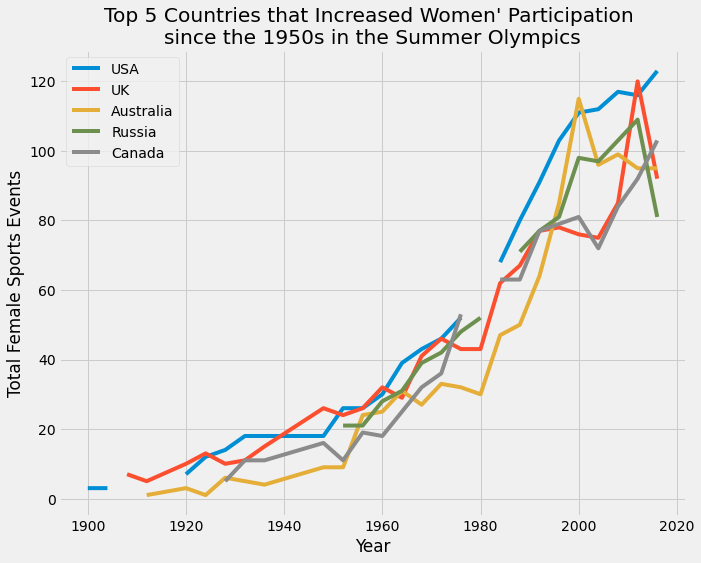

In [25]:
# Plot top 5 countries that promoted female participation in terms of athlete event count

# Transpose the dataframe
df_hist_country_t = df_hist_country.head(5).T

# Styling
plt.rcParams['figure.figsize'] = (10, 8) # set the figure size
plt.style.use('fivethirtyeight')

# Line graph
ax = df_hist_country_t.plot.line()

# Legends and axis titles
ax.legend(loc='upper left')
ax.set_ylabel('Total Female Sports Events')
plt.title("""Top 5 Countries that Increased Women' Participation 
since the 1950s in the Summer Olympics""")
plt.xlabel('Year')
plt.show()

- From the chart above, it was the western countries such as UK, USA, Australia, Russia and France that sent the most female athletes around the 1950s and continue to do so in the 1980s till this date.
- Before World War II, many countries sent fewer female athletes. Would need to perform more research online.

In [26]:
# Explore which countries contribute to the rise in Women Participation
def hist_gender_country_perc_top_ten(df, col_year, col_sex, col_country, col_event, year, false):
    
    '''
    INPUT:
    df - main pandas dataframe
    col_year - column specifying which year of olympics
    col_sex - column that describes the sex of sports event
    col_country - column that describes the countries
    col_event - column that describes the sports event
    year - year that wish to sort the table in descending order
    True/False - True means ascending while False means descending
    
    OUTPUT:
    df_new - holds event count for each sex and its proportion of total event count for each year of Summer Olympics
    '''
    
    # Sort dataframe based on year, gender & event
    df2 = df
    df2.sort_values(by=[col_year, col_event, col_sex], ascending=True, inplace=True)
    
    # Generate indicator for each unique year-gender-event combination
    df2['GENDER_EVENT_COUNT'] = 1
    df2.loc[(df2[col_year] == df2[col_year].shift()) & (df2[col_sex] == df2[col_sex].shift()) &
               (df2[col_event] == df2[col_event].shift()), 'GENDER_EVENT_COUNT'] = 0
    
    # Women
    # Generate pivot table that counts number of unique events for each year
    df_new = pd.pivot_table(df2[df2[col_sex] == 'F'], index=[col_country], columns=[col_year], values=['GENDER_EVENT_COUNT'], aggfunc=np.sum)
    
    # Flatten multi-index columns by choosing the second level
    df_new.columns = df_new.columns.droplevel(0)
    
    
    # Total (Men & Women)
    # Generate pivot table that counts number of unique events for each year
    df_new2 = pd.pivot_table(df2, index=[col_country], columns=[col_year], values=['GENDER_EVENT_COUNT'], aggfunc=np.sum)
    
    # Flatten multi-index columns by choosing the second level
    df_new2.columns = df_new2.columns.droplevel(0)
    
    # Divide Women by Total to obtain the %
    df_perc = (df_new / df_new2)
    
    # Sort table based on selected year  
    df_perc.sort_values(by=year, ascending=false, inplace=True)
    
    return df_perc.head(10)
    

# Top 10 sports
df_hist_country_perc = hist_gender_country_perc_top_ten(df, 'YEAR', 'SEX', 'REGION', 'EVENT', 1956, False)
df_hist_country_perc

YEAR,1896,1900,1904,1906,1908,1912,1920,1924,1928,1932,1936,1948,1952,1956,1960,1964,1968,1972,1976,1980,1984,1988,1992,1996,2000,2004,2008,2012,2016
REGION,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,NaN,0.000000,0.666667,0.000000,0.777778,0.285714,0.666667,0.000000,1.000000,1.000000
Chile,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,1.000000,0.500000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.250000
South Africa,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,1.000000,1.000000,0.000000,0.500000,0.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.333333,0.000000,0.500000,1.000000,0.200000,NaN,NaN
Norway,NaN,NaN,NaN,NaN,NaN,0.000000,0.090909,0.000000,NaN,0.333333,0.000000,0.333333,0.333333,0.666667,0.000000,0.000000,0.000000,0.0,0.000000,NaN,0.000000,0.333333,0.666667,1.000000,0.400000,0.000000,1.000000,NaN,0.500000
Mexico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.500000,0.714286,0.333333,0.320000,0.5,0.285714,1.000000,0.400000,0.333333,0.200000,0.200000,0.666667,0.750000,1.000000,0.500000,1.000000
Austria,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.250000,0.000000,0.000000,0.333333,0.500000,0.666667,0.500000,0.000000,1.000000,1.000000,0.0,NaN,0.000000,1.000000,1.000000,0.500000,NaN,0.000000,0.400000,0.000000,0.000000,NaN
Italy,NaN,0.500000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.250000,NaN,0.250000,0.285714,0.000000,0.500000,0.200000,0.000000,0.000000,0.0,0.000000,0.333333,0.000000,0.333333,0.333333,0.166667,0.500000,0.625000,0.444444,0.300000,0.333333
Russia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.571429,0.421053,0.000000,0.416667,0.500000,0.0,0.210526,0.343750,NaN,0.200000,0.500000,0.100000,0.700000,0.500000,0.625000,0.421053,0.533333
UK,NaN,0.166667,NaN,NaN,0.108696,0.222222,0.157895,0.083333,0.111111,0.500000,0.000000,0.600000,0.333333,0.375000,0.400000,0.500000,0.333333,0.5,0.545455,0.307692,0.272727,0.125000,0.272727,0.625000,0.500000,0.428571,0.666667,0.714286,0.600000


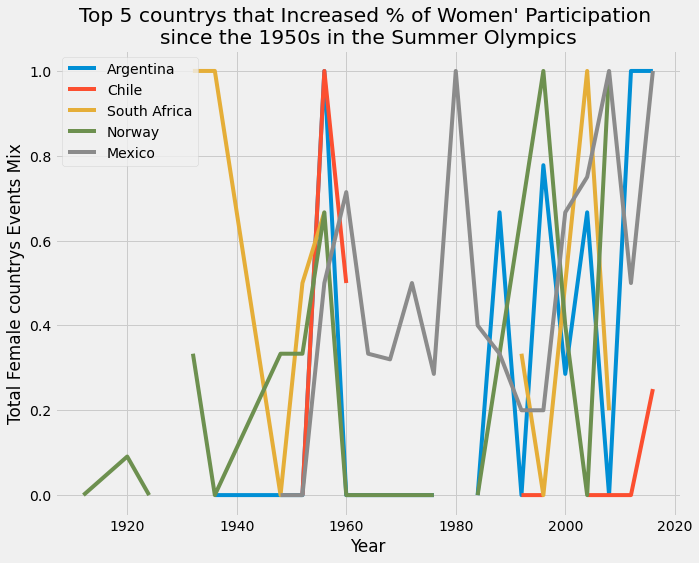

In [27]:
# Plot top 5 countries that promoted female participation in terms of athlete event mix

# Transpose the dataframe
df_hist_country_perc_t = df_hist_country_perc.head(5).T

# Styling
plt.rcParams['figure.figsize'] = (10, 8) # set the figure size
plt.style.use('fivethirtyeight')

# Line graph
ax = df_hist_country_perc_t.plot.line()

# Legends and axis titles
ax.legend(loc='upper left')
ax.set_ylabel('Total Female countrys Events Mix')
plt.title("""Top 5 countrys that Increased % of Women' Participation 
since the 1950s in the Summer Olympics""")
plt.xlabel('Year')
plt.show()

# Mix wise, it is not indicative of women participant compared to absolute count as the mix can be high but total count may be low